In [1]:
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [2]:
import numpy as np 
x = np.array([-1.0,1.0,2.0])
print(x)

[-1.  1.  2.]


In [3]:
y = x > 0
print(y)

[False  True  True]


In [4]:
y = y.astype(np.int)
print(y)

[0 1 1]


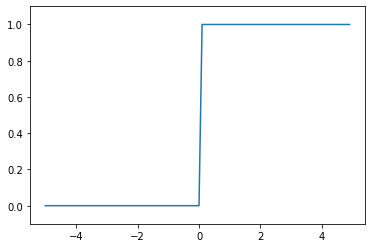

In [6]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype = np.int)

x = np.arange(-5.0, 5.0,0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [8]:
t = np.array([1.0,2.0,3.0])
1.0+t

array([2., 3., 4.])

In [9]:
1.0/t

array([1.        , 0.5       , 0.33333333])

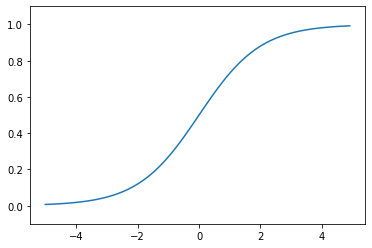

In [10]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

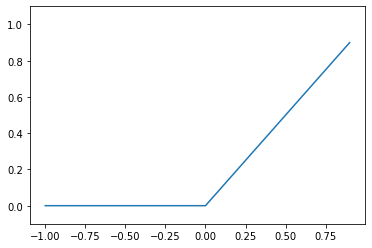

In [12]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(-1.0, 1.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [13]:
import numpy as np 
A = np.array([1,2,3,4])
print(A)

np.ndim(A)



[1 2 3 4]


1

In [14]:
A.shape

(4,)

In [15]:
A.shape[0]

4

In [16]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [17]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [22]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)
B = np.array([7,8])
#B = np.array([[7],[8]])
print(B.shape)

np.dot(A,B)

(3, 2)
(2,)


array([23, 53, 83])

In [23]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5],[2,4,6]])
print(W.shape)

Y = np.dot(X,W)
print(Y.shape)
print(Y)



(2,)
(2, 3)
(3,)
[ 5 11 17]


In [1]:
import numpy as np

### 각 층의 신호 전달 구현하기

2 X 2,3 = 3,

3, + 3, = 

In [6]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)
print(np.dot(X,W1).shape)
A1 = np.dot(X,W1) + B1

(2,)
(2, 3)
(3,)
(3,)


### A1 -> Z1 황성화 함수 처리 

In [9]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### 1층 -> 2층으로 신호 전달

In [13]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape) #3,
print(W2.shape) #3,2
print(B2.shape) #2,

# A2 2, 

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
print(Z2.shape) # 2,

(3,)
(3, 2)
(2,)
(2,)


In [14]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3 
Y = identity_function(A3) 
print(Y)

[0.31682708 0.69627909]


## 신경망 3층 입력 2층 출력 1층  구현 

In [15]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1 
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y  = identity_function(a3)

    return y 

network = init_network()

x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계 하기 
### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [19]:
#항등함수 -> 결과감을 변화없이 그대로 출력 
def identity_function(x):
    return x 

#소프트맥스 함수 -> 지수함수의 합 을 지수 함수 출력 ? 
a = np.array([0.3, 2.9, 4.0])

#1.1 지수
exp_a = np.exp(a)
print(exp_a)
#1.2 지수합
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)


[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


1.0

In [21]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

- e^10 은 20000이 넘고 아무튼 값이 커지는데 무한대로 연산이 되기 때문에 연산의 안정이 필요하다 .

In [24]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a - c )

print(np.exp(a - c) / np.sum(np.exp(a - c)))



[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [26]:
def softmax(x):
    c = np.max(x)
    exp_a = np.exp(x - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트 맥스 함수의 특징 

1. 소프트 맥스함수의 출력 합은 1
2. 확률로 해석할 수 있다.
3. 출력층의 소프트 맥스 함수는 생략해도 된다. 지수함수 계산에 드는 자원낭비 감소 ** 확률 계산할거 아니면 굳이 안해도됨

In [29]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
# 소프트 맥스
print(y)

# 소프트 맥스 합
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


## 3.5.4 출력층의 뉴런 수 정하기

- 0~9 중 하나로 분류하는 문제라면 출력 뉴런을 10개로 설정 
- 출력 뉴런 중 가장 높은 값을 보이는 것이 정답으로 판단.

## 3.6 손글씨 숫자 인식 - 순전파

- 순전파를 통해서 판단

### 3.6.1 MNIST 데이터셋

In [33]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten= True, normalize = False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
